Nama : Virgie Yunita Salsabil

NIM : 21110022

Kelas : S1-SD02A

`Next Word Generator adalah aplikasi NLP (Natural Language Processing) yang dapat memprediksi kata berikutnya dalam sebuah kalimat berdasarkan konteks yang diberikan.`

### **TUGAS**

1. Pilih satu file txt dari file zip "data" sebagai dataset untuk pelatihan

2. Running program yang ada di folder dengan dataset yang kamu pilih

3. Lakukan uji coba model kamu

4. Kumpulkan dalam bentuk pdf (ipynb di pdfkan)

## Import Library Needed

In [ ]:
# Upgrade tensorflow ke versi terbaru
!pip install --upgrade tensorflow

In [ ]:
# Utk operasi numerik, seperti manipulasi array dan matriks.
import numpy as np
# Utk membangun dan melatih model machine learning.
import tensorflow as tf

# Import class Tokenizer dari sub-module preprocessing.text dlm library Keras.
# Utk mengonversi teks menjadi urutan token (kata-kata).
from tensorflow.keras.preprocessing.text import Tokenizer

# Import class Sequential dan load_model dari sub-module models dlm library Keras.
# Sequential : membuat model secara berurutan, lapisan demi lapisan.
# load_model : utk memuat model yg telah disimpan sebelumnya.
from tensorflow.keras.models import Sequential, load_model

# Import class pad_sequences dari sub-module preprocessing.sequence dlm library Keras
# pad_sequences : Utk mengonversi urutan token menjadi matriks dg panjang yg seragam (misal: kasus padding).
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import class Embedding, LSTM & Dense dari sub-module layers dlm library Keras
# Embedding : Utk mengonversi token menjadi vektor angka real. Berguna utk representasi teks.
# LSTM : Utk memahami dan memproses urutan data.
# Dense : layer fully connected yg digunakan dlm output model.
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Import class EarlyStopping dari sub-module callbacks dlm library Keras
# EarlyStopping : Utk menghentikan pelatihan model jika suatu kondisi terpenuhi, seperti tidak adanya peningkatan performa.
from tensorflow.keras.callbacks import EarlyStopping

## Load Data

In [ ]:
# Membuka file 'lady-gaga.txt' untuk dibaca ('r'), menggunakan encoding 'unicode_escape'
with open('lady-gaga.txt', 'r', encoding='unicode_escape') as myfile:
    # Membaca seluruh konten file dan menyimpannya dalam variabel mytext
    mytext = myfile.read()

In [ ]:
# Tampilkan text
mytext

'I\'ll undress you, \'cause you\'re tired\nCover you as you desire\nWhen you fall asleep inside my arms\nMay not have the fancy things\nBut I\'ll give you everything\nYou could ever want, it\'s in my arms So baby tell me yes\nAnd I will give you everything\nSo baby tell me yes\nAnd I will be all yours tonight\nSo baby tell me yes\nAnd I will give you everything\nI will be right by your side If I can\'t find the cure, I\'ll\nI\'ll fix you with my love\nNo matter what you know, I\'ll\nI\'ll fix you with my love\nAnd if you say you\'re okay\nI\'m gonna heal you anyway\nPromise I\'ll always be there\nPromise I\'ll be the cure (be the cure) Rub your feet, your hands, your legs\nLet me take care of it, babe\nClose your eyes, I\'ll sing your favorite song\nI wrote you this lullaby\nHush now baby, don\'t you cry\nAnything you want could not be wrong So baby tell me yes\nAnd I will give you everything\nSo baby tell me yes\nAnd I will be all yours tonight\nSo baby tell me yes\nAnd I will give yo

## Preprocessing

In [ ]:
# Membuat objek Tokenizer utk mengonversi teks menjadi urutan token
my_tokenizer = Tokenizer()

# Tokenizer akan menghitung frekuensi kemunculan setiap token & membuat indeks utk setiap token
my_tokenizer.fit_on_texts([mytext])

# Menghitung total kata unik dalam teks dengan menambahkan satu, karena indeks dimulai dari 1 (indeks 0 biasanya tidak digunakan)
total_words = len(my_tokenizer.word_index) + 1

In [ ]:
# Memetakan kata-kata unik ke indeks numerik berdasar frekuensi dlm teks
my_tokenizer.word_index

{'i': 1,
 'you': 2,
 'the': 3,
 'a': 4,
 'me': 5,
 'my': 6,
 'to': 7,
 'and': 8,
 'oh': 9,
 "i'm": 10,
 'your': 11,
 'that': 12,
 'love': 13,
 'be': 14,
 'in': 15,
 'on': 16,
 'it': 17,
 "don't": 18,
 'want': 19,
 'just': 20,
 'eh': 21,
 'baby': 22,
 'with': 23,
 'of': 24,
 'but': 25,
 'we': 26,
 'what': 27,
 'wanna': 28,
 'like': 29,
 'do': 30,
 'know': 31,
 'so': 32,
 'is': 33,
 'this': 34,
 "i'll": 35,
 'can': 36,
 "you're": 37,
 'not': 38,
 "can't": 39,
 'could': 40,
 'p': 41,
 'up': 42,
 'one': 43,
 'no': 44,
 'good': 45,
 'as': 46,
 'got': 47,
 'm': 48,
 'for': 49,
 'if': 50,
 'million': 51,
 "it's": 52,
 'way': 53,
 'reasons': 54,
 'all': 55,
 'when': 56,
 'heart': 57,
 'hair': 58,
 'dance': 59,
 'gonna': 60,
 "'cause": 61,
 'out': 62,
 'la': 63,
 'girl': 64,
 'show': 65,
 'ah': 66,
 'face': 67,
 'boys': 68,
 'need': 69,
 'muh': 70,
 'touch': 71,
 'yeah': 72,
 'he': 73,
 'was': 74,
 'body': 75,
 'come': 76,
 'ha': 77,
 'give': 78,
 'down': 79,
 'make': 80,
 'tell': 81,
 'take': 

**INTERPRETASI**

- `my_tokenizer.word_index`:
<br> Atribut dari objek Tokenizer berisi kamus/dictionary yang memetakan kata-kata unik dlm teks ke indeks numerik.
- Setiap kata diberi indeks berdasarkan frekuensinya dalam teks. Indeks ini digunakan saat membuat representasi numerik dari teks menggunakan token.
- Dalam contoh di atas -> indeks 1 diberikan pada kata 'I', indeks 2 pada 'You', dan seterusnya.

In [ ]:
# Membuat list kosong 'my_input_sequences' utk menyimpan urutan token berdasarkan n-gram
my_input_sequences = []

# Melakukan iterasi pada setiap baris teks yg dipisahkan berdasarkan karakter newline ('\n')
for line in mytext.split('\n'):
    # Mengonversi setiap baris teks menjadi urutan token menggunakan my_tokenizer
    token_list = my_tokenizer.texts_to_sequences([line])[0]
    print(token_list)

    # Melakukan iterasi pada setiap indeks dalam token_list
    for i in range(1, len(token_list)):
        # Membuat n-gram sequence dari token_list hingga indeks ke-i
        my_n_gram_sequence = token_list[:i+1]
        # Menambahkan n-gram sequence ke dalam my_input_sequences
        my_input_sequences.append(my_n_gram_sequence)
        # print(input_sequences)

[35, 826, 2, 61, 37, 827]
[407, 2, 46, 2, 723]
[56, 2, 297, 828, 244, 6, 580]
[361, 38, 108, 3, 643, 232]
[25, 35, 78, 2, 179]
[2, 40, 408, 19, 52, 15, 6, 580, 32, 22, 81, 5, 264]
[8, 1, 139, 78, 2, 179]
[32, 22, 81, 5, 264]
[8, 1, 139, 14, 55, 644, 105]
[32, 22, 81, 5, 264]
[8, 1, 139, 78, 2, 179]
[1, 139, 14, 140, 343, 11, 502, 50, 1, 39, 214, 3, 198, 35]
[35, 193, 2, 23, 6, 13]
[44, 382, 27, 2, 31, 35]
[35, 193, 2, 23, 6, 13]
[8, 50, 2, 90, 37, 298]
[10, 60, 383, 2, 581]
[233, 35, 199, 14, 151]
[233, 35, 14, 3, 198, 14, 3, 198, 582, 11, 829, 11, 137, 11, 830]
[109, 5, 82, 323, 24, 17, 129]
[645, 11, 155, 35, 468, 11, 583, 384]
[1, 831, 2, 34, 982]
[469, 106, 22, 18, 2, 143]
[503, 2, 19, 40, 38, 14, 276, 32, 22, 81, 5, 264]
[8, 1, 139, 78, 2, 179]
[32, 22, 81, 5, 264]
[8, 1, 139, 14, 55, 644, 105]
[32, 22, 81, 5, 264]
[8, 1, 139, 78, 2, 179]
[1, 139, 14, 140, 343, 11, 502, 50, 1, 39, 214, 3, 198, 35]
[35, 193, 2, 23, 6, 13]
[44, 382, 27, 2, 31, 35]
[35, 193, 2, 23, 6, 13]
[8, 50, 2, 

In [ ]:
# Membuat list kosong 'my_input_sequences' untuk menyimpan urutan token berdasarkan n-gram
my_input_sequences = []

# Melakukan iterasi pada setiap baris teks yang dipisahkan berdasarkan karakter newline ('\n')
for line in mytext.split('\n'):
    # Mengonversi setiap baris teks menjadi urutan token menggunakan my_tokenizer
    token_list = my_tokenizer.texts_to_sequences([line])[0]

    # Melakukan iterasi pada setiap indeks dalam token_list
    for i in range(1, len(token_list)):
        # Membuat n-gram sequence dari token_list hingga indeks ke-i
        my_n_gram_sequence = token_list[:i+1]

        # Menampilkan n-gram sequence ke layar (dapat di-comment atau dihapus jika tidak diperlukan)
        print(my_n_gram_sequence)

        # Menambahkan n-gram sequence ke dalam my_input_sequences
        my_input_sequences.append(my_n_gram_sequence)
        # print(input_sequences)

Streaming output truncated to the last 5000 lines.
[213, 3, 178, 213, 3, 1253, 213, 3, 2084, 72, 94, 166, 12, 269, 846, 718]
[213, 3, 178, 213, 3, 1253, 213, 3, 2084, 72, 94, 166, 12, 269, 846, 718, 2085]
[65, 130]
[65, 130, 97]
[65, 130, 97, 26]
[65, 130, 97, 26, 30]
[65, 130, 97, 26, 30, 17]
[381, 20]
[381, 20, 353]
[381, 20, 353, 53]
[381, 20, 353, 53, 7]
[381, 20, 353, 53, 7, 1170]
[381, 20, 353, 53, 7, 1170, 1]
[381, 20, 353, 53, 7, 1170, 1, 13]
[381, 20, 353, 53, 7, 1170, 1, 13, 2]
[381, 20, 353, 53, 7, 1170, 1, 13, 2, 8]
[381, 20, 353, 53, 7, 1170, 1, 13, 2, 8, 52]
[381, 20, 353, 53, 7, 1170, 1, 13, 2, 8, 52, 329]
[381, 20, 353, 53, 7, 1170, 1, 13, 2, 8, 52, 329, 660]
[35, 335]
[35, 335, 159]
[35, 335, 159, 15]
[35, 335, 159, 15, 6]
[35, 335, 159, 15, 6, 2086]
[35, 335, 159, 15, 6, 2086, 8]
[35, 335, 159, 15, 6, 2086, 8, 214]
[35, 335, 159, 15, 6, 2086, 8, 214, 4]
[35, 335, 159, 15, 6, 2086, 8, 214, 4, 53]
[8, 56]
[8, 56, 2]
[8, 56, 2, 90]
[8, 56, 2, 90, 12]
[8, 56, 2, 90, 12, 1

In [ ]:
# Menghitung panjang maksimum dari semua n-gram sequence dlm my_input_sequences
max_sequence_len = max([len(seq) for seq in my_input_sequences])

# Menggunakan pad_sequences dari NumPy untuk mengonversi my_input_sequences menjadi matriks 2D dengan panjang yang seragam
# Matriks ini akan berisi n-gram sequence yang sudah dipad dengan nilai 0 di bagian awal (padding='pre')
# digunakan sebagai input untuk model LSTM
input_sequences = np.array(pad_sequences(my_input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
# Tampilkan
input_sequences

array([[  0,   0,   0, ...,   0,  35, 826],
       [  0,   0,   0, ...,  35, 826,   2],
       [  0,   0,   0, ..., 826,   2,  61],
       ...,
       [  0,   0,   0, ...,  33,   4, 981],
       [  0,   0,   0, ...,   4, 981,  94],
       [  0,   0,   0, ..., 981,  94, 360]], dtype=int32)

In [ ]:
# Memisahkan matriks input_sequences menjadi dua bagian: X dan y
X = input_sequences[:, :-1] # Mengambil semua kolom kecuali kolom terakhir
y = input_sequences[:, -1] # Mengambil kolom terakhir

In [ ]:
X[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  35, 826,   2], dtype=int32)

In [ ]:
y[2]

61

In [ ]:
X

array([[  0,   0,   0, ...,   0,   0,  35],
       [  0,   0,   0, ...,   0,  35, 826],
       [  0,   0,   0, ...,  35, 826,   2],
       ...,
       [  0,   0,   0, ...,  94,  33,   4],
       [  0,   0,   0, ...,  33,   4, 981],
       [  0,   0,   0, ...,   4, 981,  94]], dtype=int32)

In [ ]:
y

array([826,   2,  61, ..., 981,  94, 360], dtype=int32)

In [ ]:
# lakukan one hot encoding
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Define Models

In [ ]:
# Membuat objek model sequential untuk membuat model secara berurutan
model = tf.keras.models.Sequential()

# Menambahkan layer Embedding sebagai layer pertama dari model
# Embedding akan mengonversi input token menjadi vektor dg dimensi 100
# Input_length diatur sebagai panjang maksimum dari n-gram sequence dikurangi satu
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))

# Menambahkan layer LSTM (Long Short-Term Memory)
# LSTM utk memproses urutan data secara temporal
# jumlah unit LSTM yg digunakan : 150
model.add(LSTM(150))

# Menambahkan layer Dense sebagai layer output
# Dense dgn total_words unit dan fungsi aktivasi softmax
# Menghasilkan distribusi probabilitas utk setiap token pada output layer
model.add(Dense(total_words, activation='softmax'))

# Menampilkan ringkasan (summary) dari arsitektur model
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 69, 100)           227100    
                                                                 
 lstm_5 (LSTM)               (None, 150)               150600    
                                                                 
 dense_5 (Dense)             (None, 2271)              342921    
                                                                 
Total params: 720621 (2.75 MB)
Trainable params: 720621 (2.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


`Model akan berhenti dilatih jika tidak ada peningkatan yang signifikan pada akurasi selama jumlah epoch yang ditentukan oleh patience:`

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy', patience=5, min_delta=0.01,
                               mode='max', verbose=1)

**PENJELASAN**

- monitor='accuracy': Memonitor metrik akurasi model selama pelatihan.

- patience=5: Menentukan jumlah epoch yang akan dipertahankan tanpa adanya peningkatan pada metrik yang dimonitor sebelum pelatihan dihentikan. Dalam contoh ini, pelatihan akan dihentikan jika akurasi tidak meningkat selama 5 epoch berturut-turut.

- min_delta=0.01: Menentukan perubahan minimum yang dianggap sebagai peningkatan. Jika perubahan akurasi kurang dari min_delta, itu tidak dianggap sebagai peningkatan.

- mode='max': Menunjukkan bahwa kita ingin memaksimalkan metrik yang dimonitor (dalam hal ini, akurasi). Jika kita memonitor loss dan ingin meminimalkannya, kita bisa menggunakan mode='min'.

- verbose=1: Menampilkan pesan informasi saat early stopping diaktifkan.

In [ ]:
# Kompilasi model dg konfigurasi tertentu
# Loss function yg digunakan -> categorical crossentropy
# Optimizer yg digunakan -> Adam
# Metrik evaluasi yang digunakan -> akurasi
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## TRAINING MODEL

In [ ]:
# Melatih model menggunakan data X dan y
# Model akan melatih dirinya sendiri utk memahami pola dlm urutan token
# Proses pelatihan akan dilakukan selama 100 epochs (iterasi)
# Verbose=1 mengaktifkan tampilan progres pelatihan
hist = model.fit(X, y, epochs=100, verbose=1, callbacks=[early_stopping])

Epoch 1/100
828/828 [==============================] - 69s 81ms/step - loss: 6.0039 - accuracy: 0.0465
Epoch 2/100
828/828 [==============================] - 65s 79ms/step - loss: 4.9953 - accuracy: 0.1486
Epoch 3/100
828/828 [==============================] - 66s 80ms/step - loss: 4.1391 - accuracy: 0.2583
Epoch 4/100
828/828 [==============================] - 66s 79ms/step - loss: 3.4932 - accuracy: 0.3533
Epoch 5/100
828/828 [==============================] - 65s 79ms/step - loss: 2.9960 - accuracy: 0.4257
Epoch 6/100
828/828 [==============================] - 64s 77ms/step - loss: 2.6035 - accuracy: 0.4890
Epoch 7/100
828/828 [==============================] - 64s 77ms/step - loss: 2.2815 - accuracy: 0.5401
Epoch 8/100
828/828 [==============================] - 63s 76ms/step - loss: 2.0138 - accuracy: 0.5840
Epoch 9/100
828/828 [==============================] - 63s 77ms/step - loss: 1.7866 - accuracy: 0.6246
Epoch 10/100
828/828 [==============================] - 64s 77ms/step - l

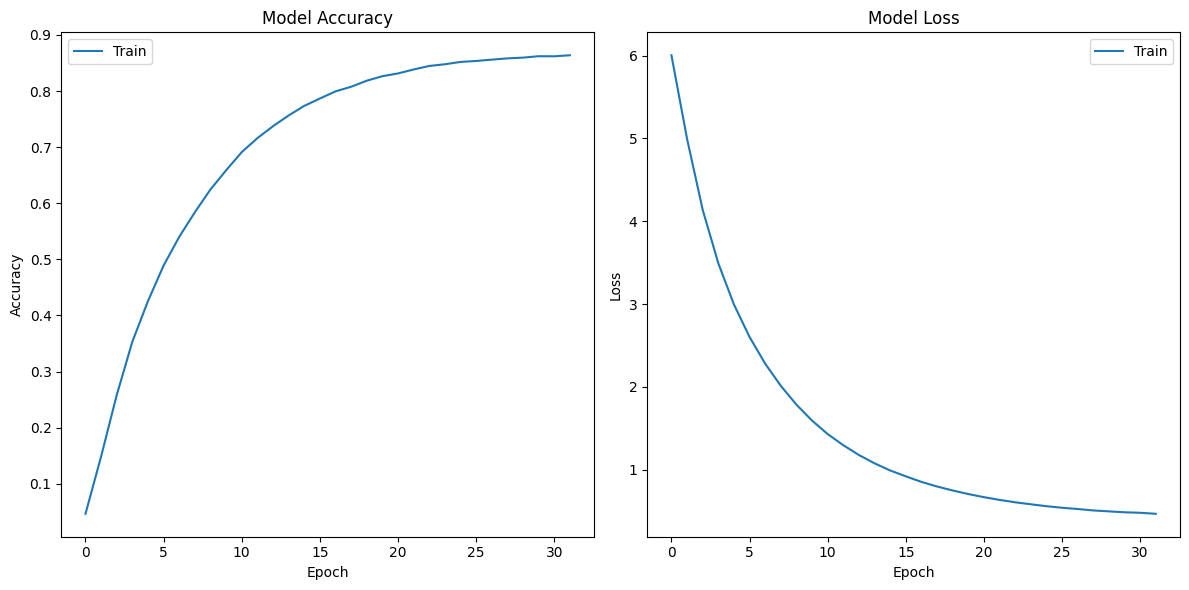

In [ ]:
# Mengimpor library matplotlib untuk membuat visualisasi plot
import matplotlib.pyplot as plt

# Membuat plot untuk melihat perubahan akurasi dan loss selama proses pelatihan model
plt.figure(figsize=(12, 6))  # Mengatur ukuran gambar plot

# Subplot pertama untuk plot akurasi
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train')  # Plot akurasi data latih
plt.title('Model Accuracy')  # Menyertakan judul plot
plt.xlabel('Epoch')  # Label sumbu x
plt.ylabel('Accuracy')  # Label sumbu y
plt.legend()  # Menampilkan legenda

# Subplot kedua untuk plot loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train')  # Plot loss data latih
plt.title('Model Loss')  # Menyertakan judul plot
plt.xlabel('Epoch')  # Label sumbu x
plt.ylabel('Loss')  # Label sumbu y
plt.legend()  # Menampilkan legenda

plt.tight_layout()  # Menyesuaikan tata letak plot untuk tampilan yang lebih rapi
plt.show()  # Menampilkan plot

## Save Model

In [ ]:
# Simpan model
model.save("modelku.h5")

## Load Model

In [ ]:
model_loaded = load_model("modelku.h5")

## Make Prediction

In [ ]:
# Membuat teks input awal yang akan digunakan untuk memprediksi kata-kata selanjutnya
input_text = "baby"

# Menentukan jumlah kata yang akan diprediksi selanjutnya
predict_next_words = 20

# Melakukan iterasi untuk memprediksi kata-kata selanjutnya berdasarkan teks input
for _ in range(predict_next_words):
    # Mengonversi teks input menjadi urutan token menggunakan tokenizer yang telah dipelajari sebelumnya
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]

    # Melakukan padding pada urutan token untuk memastikan panjang yang sesuai dengan model
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    # Memprediksi probabilitas untuk kata-kata selanjutnya berdasarkan urutan token
    predictions = model_loaded.predict(token_list)[0]

    # Mengambil indeks dari kata-kata teratas yang diprediksi
    top_indices = np.argsort(predictions)[-5:][::-1]  # Mengambil 5 kata teratas, sesuaikan dengan kebutuhan

    # Mengambil kata-kata yang sesuai dengan indeks yang diprediksi
    next_words = [word for word, index in my_tokenizer.word_index.items() if index in top_indices]

    # Menampilkan teks input dan kata-kata selanjutnya beserta probabilitasnya
    print("Input Text:", input_text)
    print("Next Words and Probabilities:")
    for word, index in zip(next_words, top_indices):
        probability = predictions[index]
        print(f"{word}: {probability:.4f}")

    # Memilih kata dengan probabilitas tertinggi sebagai kata selanjutnya
    output_word = my_tokenizer.index_word[top_indices[0]]

    # Menambahkan kata yang dipilih ke dalam teks input untuk iterasi selanjutnya
    input_text += " " + output_word

# Menampilkan teks hasil prediksi
display(input_text)

1/1 [==============================] - 0s 21ms/step
Input Text: baby
Next Words and Probabilities:
i: 0.2244
don't: 0.1568
you're: 0.1271
cause: 0.1047
loves: 0.0815
1/1 [==============================] - 0s 24ms/step
Input Text: baby don't
Next Words and Probabilities:
you: 0.8108
give: 0.1574
have: 0.0072
stop: 0.0040
cry: 0.0037
1/1 [==============================] - 0s 21ms/step
Input Text: baby don't cry
Next Words and Probabilities:
you: 0.5243
it: 0.1404
for: 0.0899
handle: 0.0653
anymore: 0.0365
1/1 [==============================] - 0s 23ms/step
Input Text: baby don't cry anymore
Next Words and Probabilities:
to: 0.3839
love: 0.2994
can't: 0.1139
could: 0.0803
keep: 0.0183
1/1 [==============================] - 0s 23ms/step
Input Text: baby don't cry anymore to
Next Words and Probabilities:
feel: 0.6099
keep: 0.1356
leave: 0.0670
loose: 0.0392
hate: 0.0285
1/1 [==============================] - 0s 26ms/step
Input Text: baby don't cry anymore to keep
Next Words and Probabilitie

"baby don't cry anymore to keep it work it back of him ain't no other and if i left my head"

**KESIMPULAN**

- Dari output di atas, terlihat bahwa model telah menghasilkan prediksi untuk kata-kata selanjutnya berdasarkan teks input awal "baby". Iterasi dilakukan sebanyak 20 kali, dan pada setiap iterasi, model memprediksi beberapa kata yang memiliki probabilitas tertinggi.


In [ ]:
# Menentukan teks input awal yang akan digunakan untuk memulai prediksi
input_text = "i will give you"
# Menentukan jumlah kata yang akan diprediksi selanjutnya
predict_next_words = 15

# Melakukan iterasi sebanyak predict_next_words untuk memprediksi kata-kata selanjutnya berdasarkan teks input
for _ in range(predict_next_words):
    # Mengonversi teks input menjadi urutan token menggunakan tokenizer yang telah dipelajari sebelumnya
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    print(token_list)

    # Melakukan padding pada urutan token untuk memastikan panjang yang sesuai dengan model
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    # Memprediksi indeks token dengan probabilitas tertinggi menggunakan model
    predicted = np.argmax(model_loaded.predict(token_list), axis=-1)

    # Mendapatkan kata yang sesuai dengan indeks yang diprediksi
    output_word = ""
    for word, index in my_tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    # Menambahkan kata yang diprediksi ke dalam teks input untuk iterasi selanjutnya
    input_text += " " + output_word

# Tampilkan hasil
print(input_text)

[1, 139, 78, 2]
1/1 [==============================] - 0s 24ms/step
[1, 139, 78, 2, 179]
1/1 [==============================] - 0s 22ms/step
[1, 139, 78, 2, 179, 72]
1/1 [==============================] - 0s 22ms/step
[1, 139, 78, 2, 179, 72, 1]
1/1 [==============================] - 0s 22ms/step
[1, 139, 78, 2, 179, 72, 1, 31]
1/1 [==============================] - 0s 21ms/step
[1, 139, 78, 2, 179, 72, 1, 31, 12]
1/1 [==============================] - 0s 23ms/step
[1, 139, 78, 2, 179, 72, 1, 31, 12, 52]
1/1 [==============================] - 0s 22ms/step
[1, 139, 78, 2, 179, 72, 1, 31, 12, 52, 32]
1/1 [==============================] - 0s 21ms/step
[1, 139, 78, 2, 179, 72, 1, 31, 12, 52, 32, 563]
1/1 [==============================] - 0s 22ms/step
[1, 139, 78, 2, 179, 72, 1, 31, 12, 52, 32, 563, 25]
1/1 [==============================] - 0s 26ms/step
[1, 139, 78, 2, 179, 72, 1, 31, 12, 52, 32, 563, 25, 73]
1/1 [==============================] - 0s 22ms/step
[1, 139, 78, 2, 179, 72, 1,

**KESIMPULAN**

- Model telah menghasilkan teks prediksi yang memiliki kelanjutan dan makna. Meskipun tidak selalu membentuk kalimat yang sempurna, hasilnya cukup mengikuti pola kata-kata yang masuk akal berdasarkan konteks input awal.